<a href="https://colab.research.google.com/github/ghdakrk/ML/blob/main/decision_tree2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import seaborn as sns

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
feature_names = ['pclass', 'age', 'sex']
dfX = df[feature_names].copy()
dfy = df['survived'].copy()
dfX.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


In [15]:
# 누락데이터 처리
# 성별 인코딩
from sklearn.preprocessing import LabelEncoder
dfX["sex"] = LabelEncoder().fit_transform(dfX['sex'])
dfX.tail()

,pclass,age,sex
886,2,27.0,1
887,1,19.0,0
888,3,NaN,0
889,1,26.0,1
890,3,32.0,1


In [16]:
dfX['age'].fillna(dfX['age'].mean(), inplace=True)
dfX.tail(5)

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


In [17]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer

dfX2 = pd.DataFrame(LabelBinarizer().fit_transform(dfX['pclass']),
                    columns=['c1', 'c2', 'c3'], index=dfX.index)
dfX = pd.concat([dfX, dfX2], axis=1)

In [18]:
del(dfX['pclass'])
dfX.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0,1,0
887,19.000000,0,1,0,0
888,29.699118,0,0,0,1
889,26.000000,1,1,0,0
890,32.000000,1,0,0,1


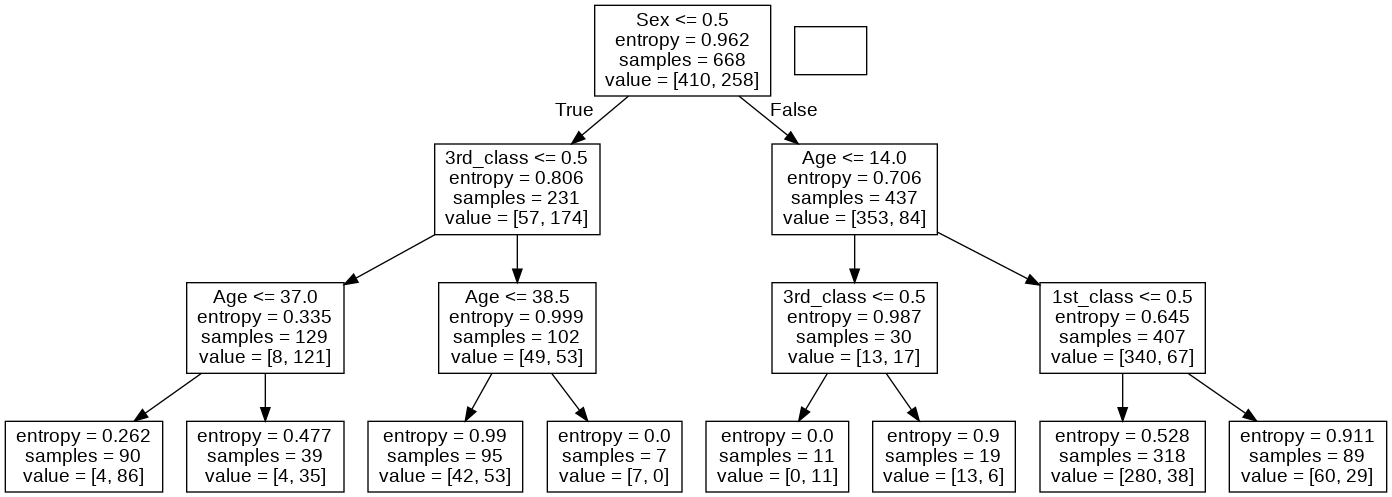

In [21]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_tet, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5).fit(X_train, y_train)
command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, feature_names=[
                "Age", "Sex", "1st_class", "2nd_class", "3rd_class"])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

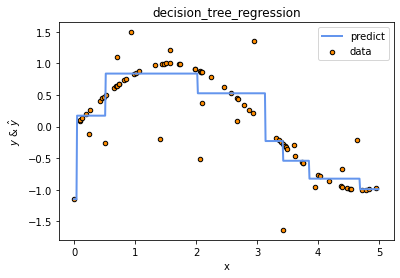

In [23]:
# 회귀분석에 이용
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))
regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X, y)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_hat = regtree.predict(X_test)
# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_hat, color="cornflowerblue", linewidth=2, label="predict")
plt.xlabel("x")
plt.ylabel(r"$y$ & $\hat{y}$")
plt.title("decision_tree_regression")
plt.legend()
plt.show()